In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data

In [43]:
X_train = np.loadtxt('data/train.dat', delimiter = ' ')
y_train = np.loadtxt('data/train.labels', dtype = int)
X_test = np.loadtxt('data/test.dat')

In [48]:
y_train

array([2, 1, 1, ..., 2, 2, 8])

In [35]:
X_test.shape

(5296, 887)

### Visualization

<AxesSubplot: ylabel='count'>

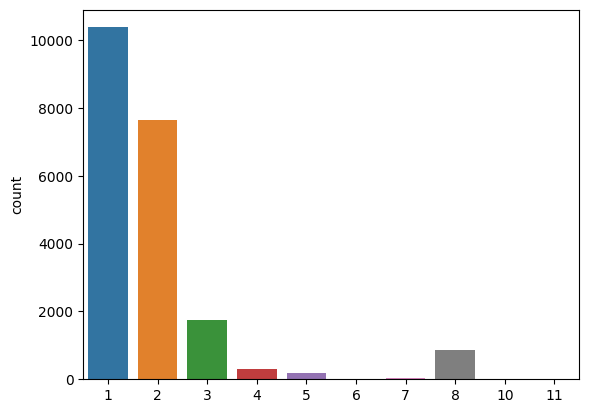

In [49]:
sns.countplot(x = y_train)

### Preprocessing

In [8]:
from sklearn import preprocessing

In [9]:
normalizer = preprocessing.Normalizer().fit(X_train)
X_train_nr = normalizer.transform(X_train)
X_test_nr = normalizer.transform(X_test)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Dimensionality Reduction

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 11)
X_train_dr = pca.fit_transform(X_train_nr)
X_test_dr = pca.transform(X_test_nr)


### Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
LGR = LogisticRegression(max_iter = 1000)
LGR.fit(X_train_dr,y_train)

LogisticRegression(max_iter=1000)

In [14]:
y_test = LGR.predict(X_test_dr)

In [15]:
labels = y_test.astype(int)
labels

array([1, 1, 1, ..., 1, 1, 1])

In [16]:
# outputFile = open("output_lr.dat", "w")
# for index in labels:
#     outputFile.write(str(index) +'\n')
# outputFile.close()


### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [18]:
y_pred_rfc = classifier.predict(X_test)

In [19]:
labels_rfc = y_pred_rfc.astype(int)

In [20]:
labels_rfc

array([1, 1, 2, ..., 2, 1, 2])

In [21]:
# outputFile = open("output_rfc_1.dat", "w")
# for index in labels_rfc:
#     outputFile.write(str(index) +'\n')
# outputFile.close()


### Multi Layer Perceptron

In [22]:
from sklearn.neural_network import MLPClassifier

In [23]:
mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1, hidden_layer_sizes=(50,), max_iter = 5000)
mlp_clf

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(50,), max_iter=5000,
              random_state=1, solver='lbfgs')

In [24]:
mlp_clf.fit(X_train_nr, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(50,), max_iter=5000,
              random_state=1, solver='lbfgs')

In [25]:
y_test = mlp_clf.predict(X_test_nr)

In [26]:
mlp_labels = y_test.astype(int)

In [27]:
mlp_labels

array([1, 1, 1, ..., 1, 1, 1])

In [28]:
# outputFile = open("output_mlp_1.dat", "w")
# for index in mlp_labels:
#     outputFile.write(str(index) +'\n')
# outputFile.close()

### SVM

In [29]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear', random_state=0)

In [30]:
svm_pred = classifier.predict(X_test)

In [34]:
svm_labels = svm_pred.astype(int)
svm_labels

array([1, 1, 2, ..., 2, 1, 2])